<a href="https://colab.research.google.com/github/taraudani/finalproj/blob/main/Initial_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [3]:
aclr_orig = pd.read_csv('cleaned_aclr_data.csv')

In [4]:
aclr = pd.read_csv('cleaned_aclr_data.csv')

In [5]:
aclr

,record_id,sex_dashboard,age,age_group,tss,tss_dashboard,ikdc,acl_rsi,lsi_ext_mvic_90,lsi_ext_mvic_60,lsi_flex_mvic_60,lsi_ext_isok_60,lsi_flex_isok_60
0,1,Male,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Male,21.700000,5.0,13.7,13 to 24 months,95.4,87.5,92.73,NaN,NaN,87.860000,103.320000
2,1,Male,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Female,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Female,14.500000,2.0,7.6,5 to 7 months,79.3,8.3,NaN,NaN,NaN,45.000000,72.980000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,4737,Male,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11146,4737,Male,17.966667,3.0,6.9,5 to 7 months,NaN,NaN,NaN,NaN,NaN,39.470109,92.639594
11147,4738,Female,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11148,4738,Female,15.750000,3.0,5.9,5 to 7 months,NaN,54.0,NaN,NaN,NaN,85.435897,99.436090


## **Graphs:**

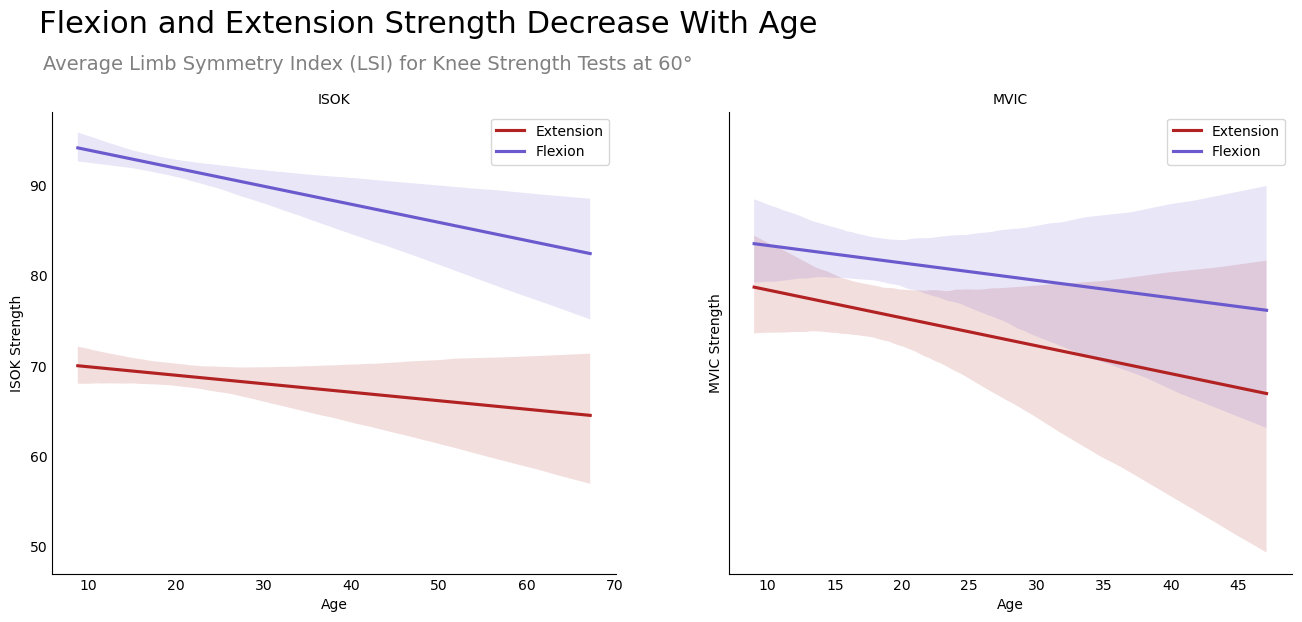

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.despine(top=True, right=True, left=False, bottom=False)

isok = aclr[[col for col in aclr.columns if 'isok' in col]].copy()
isok['age'] = aclr['age']
isok = isok.melt(id_vars='age', var_name="Measurement", value_name="Value")
isok.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
isok.dropna(inplace=True)

mvic = aclr[[col for col in aclr.columns if 'mvic_60' in col]].copy()
mvic['age'] = aclr['age']
mvic = mvic.melt(id_vars='age', var_name="Measurement", value_name="Value")
mvic.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
mvic.dropna(inplace=True)

isok_avg = isok.groupby(['age', 'Measurement'])['Value'].mean().reset_index()
mvic_avg = mvic.groupby(['age', 'Measurement'])['Value'].mean().reset_index()

isok_measurements = isok_avg['Measurement'].unique()
mvic_measurements = mvic_avg['Measurement'].unique()

for m in isok_measurements:
    subset = isok_avg[isok_avg['Measurement'] == m]
    label = 'Extension' if 'ext' in m else 'Flexion'
    color = 'firebrick' if 'ext' in m else 'slateblue'
    sns.regplot(ax=axes[0], data=subset, x='age', y='Value', label= label, color = color, scatter=False)
axes[0].tick_params(axis='both', which='both', length=0)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('ISOK Strength')
axes[0].set_title('ISOK', fontsize = 10)
axes[0].legend()

for m in mvic_measurements:
    subset = mvic_avg[mvic_avg['Measurement'] == m]
    label = 'Extension' if 'ext' in m else 'Flexion'
    color = 'firebrick' if 'ext' in m else 'slateblue'
    sns.regplot(ax=axes[1], data=subset, x='age', y='Value', label= label, color = color, scatter=False)
axes[1].tick_params(axis='both', which='both', length=0)
axes[1].set_xlabel('Age')
axes[1].set_title('MVIC', fontsize = 10)
axes[1].set_ylabel('MVIC Strength')
axes[1].legend()

fig.suptitle('Flexion and Extension Strength Decrease With Age', fontsize=22, y=1.05, x =0.36)
fig.text(0.525, 0.975, 'Average Limb Symmetry Index (LSI) for Knee Strength Tests at 60°', ha='right', va='top', fontsize=14, color='gray')

plt.show()

In [7]:
acl_grouped = aclr.groupby('tss_dashboard').agg(
    mean_ext_mvic_60=('lsi_ext_mvic_60', 'mean'),
    mean_flex_mvic=('lsi_flex_mvic_60', 'mean'),
    mean_ext_isok=('lsi_ext_isok_60', 'mean'),
    mean_flex_isok=('lsi_flex_isok_60', 'mean')
).reset_index()

In [8]:
new_order = [1,2,3,0,4,5]
acl_grouped = acl_grouped.iloc[new_order]
acl_grouped = acl_grouped.reset_index(drop=True)
acl_grouped = acl_grouped.drop(index=[1,2,4,5])

acl_grouped = acl_grouped.reset_index(drop=True)
acl_grouped

,tss_dashboard,mean_ext_mvic_60,mean_flex_mvic,mean_ext_isok,mean_flex_isok
0,3 to 4 months,69.291246,76.021983,63.093288,81.837862
1,13 to 24 months,76.286429,78.357143,79.723066,96.363400


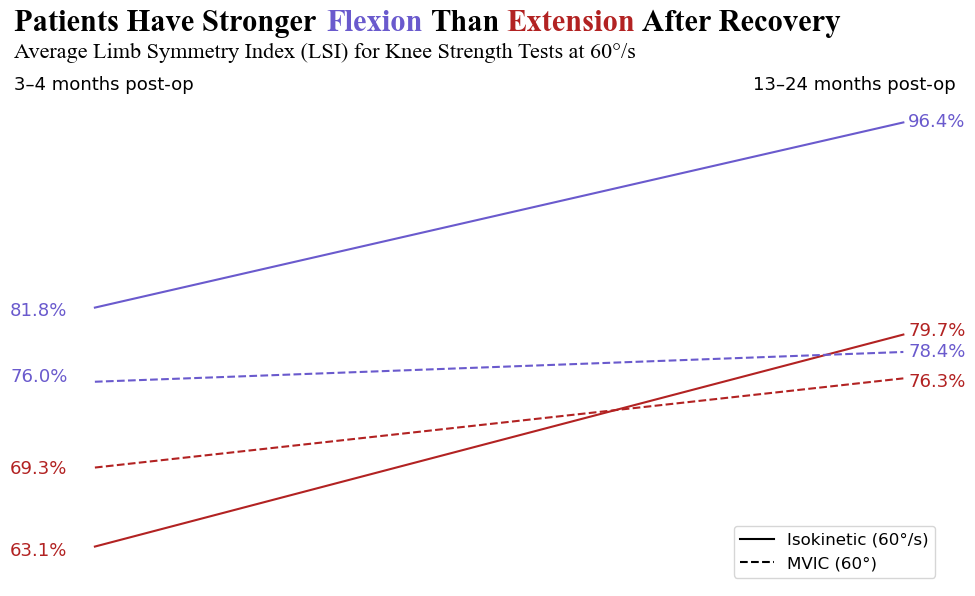

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

#graph slopes
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_ext_isok'], linestyle='-', color='firebrick', label='Extension Isokinetic')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_flex_isok'], linestyle='-', color='slateblue', label='Flexion Isokinetic')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_flex_mvic'], linestyle='--', color='slateblue', label='Flexion MVIC')
ax.plot(acl_grouped['tss_dashboard'], acl_grouped['mean_ext_mvic_60'], linestyle='--', color='firebrick', label='Extension MVIC')

#remove unnecessary scaffolding
ax.set_ylim(60, 100)
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xticks([])
ax.set_xlabel('')
sns.despine(top=True, right=True, left=True, bottom=True)

#add a legend for line type
custom_legend = [
    Line2D([0], [0], color='black', linestyle='-', label='Isokinetic (60°/s)'),
    Line2D([0], [0], color='black', linestyle='--', label='MVIC (60°)')
]
ax.legend(handles=custom_legend, loc='lower right', fontsize=12)

#add color coded title (with degrees)
plt.text(0.125, 1.13, 'Patients Have Stronger', ha='center', va='top', fontsize=22, font='Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.36, 1.13, 'Flexion', ha='center', va='top', fontsize=22, color='slateblue', font='Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.462, 1.13, 'Than', ha='center', va='top', fontsize=22, font='Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.58, 1.13, 'Extension', ha='center', va='top', fontsize=22, color='firebrick', font='Times New Roman', fontweight='bold', transform=ax.transAxes)
plt.text(0.772, 1.13, 'After Recovery', ha='center', va='top', fontsize=22, font='Times New Roman', fontweight='bold', transform=ax.transAxes)

#add a subtitle
plt.text(-0.045, 1.065, 'Average Limb Symmetry Index (LSI) for Knee Strength Tests at 60°/s',
         ha='left', va='top', fontsize=16, font='Times New Roman', transform=ax.transAxes)

#label the lines
plt.text(-0.05, 0.53, '81.8%', color='slateblue', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.9, '96.4%', color='slateblue', fontsize=13, transform=ax.transAxes)

plt.text(-0.05, 0.4, '76.0%', color='slateblue', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.45, '78.4%', color='slateblue', fontsize=13, transform=ax.transAxes)

plt.text(-0.05, 0.06, '63.1%', color='firebrick', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.49, '79.7%', color='firebrick', fontsize=13, transform=ax.transAxes)

plt.text(-0.05, 0.22, '69.3%', color='firebrick', fontsize=13, transform=ax.transAxes)
plt.text(0.96, 0.39, '76.3%', color='firebrick', fontsize=13, transform=ax.transAxes)

#label axes
plt.text(0.055, 1, "3–4 months post-op", ha='center', va='top', fontsize=13, transform=ax.transAxes)
plt.text(0.9, 1, "13–24 months post-op", ha='center', va='top', fontsize=13, transform=ax.transAxes)
plt.tight_layout()


#### see the relationship between flexion strength and psychological readiness & isokinetic strength and psychological readiness

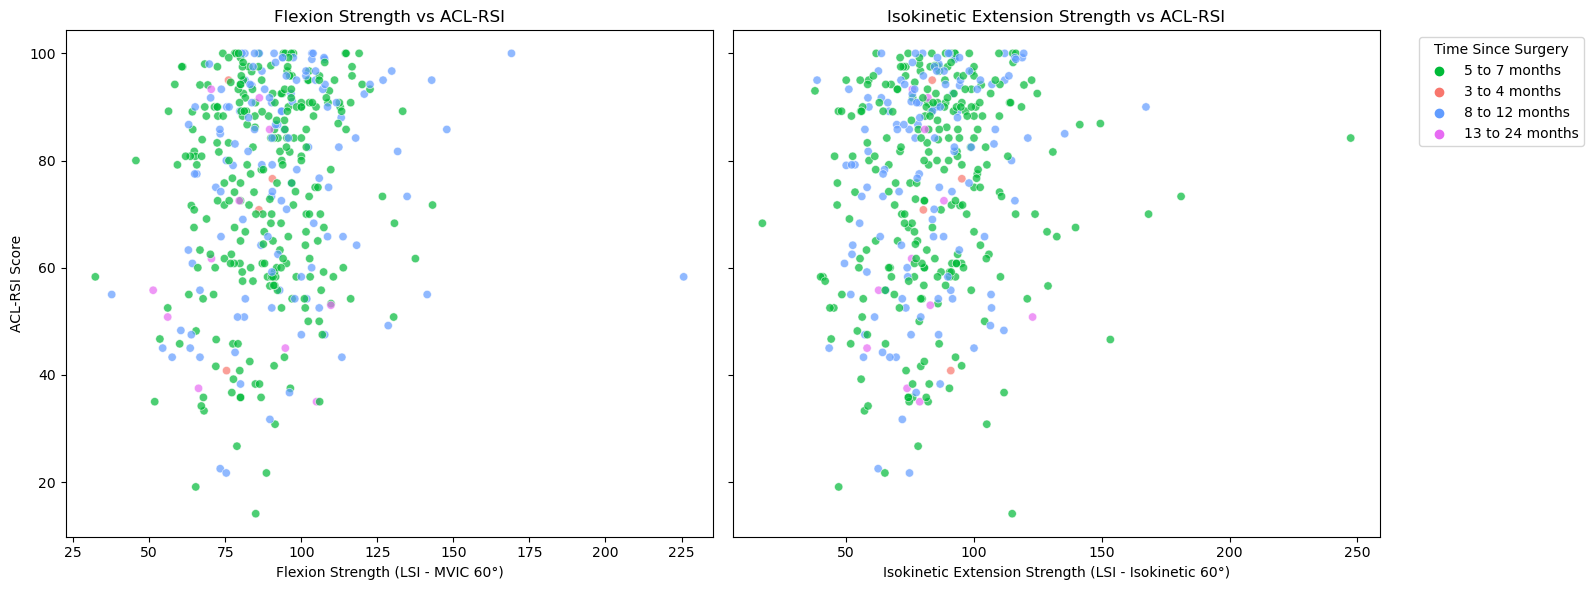

In [10]:
# Filter and clean the data
df_clean = aclr[['tss_dashboard', 'lsi_flex_mvic_60', 'lsi_ext_isok_60', 'acl_rsi']].dropna()
df_clean = df_clean[df_clean['tss_dashboard'] != 'Not Reported']

# Define a consistent order and color palette
hue_order = ['3 to 4 months', '5 to 7 months', '8 to 12 months', '13 to 24 months']
palette = {
    '3 to 4 months': '#F8766D',
    '5 to 7 months': '#00BA38',
    '8 to 12 months': '#619CFF',
    '13 to 24 months': '#E76BF3'
}

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Flexion Strength Plot
sns.scatterplot(
    data=df_clean,
    x='lsi_flex_mvic_60',
    y='acl_rsi',
    hue='tss_dashboard',
    palette=palette,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5,
    ax=axes[0]
)
axes[0].set_title("Flexion Strength vs ACL-RSI")
axes[0].set_xlabel("Flexion Strength (LSI - MVIC 60°)")
axes[0].set_ylabel("ACL-RSI Score")

# Extension Strength Plot
sns.scatterplot(
    data=df_clean,
    x='lsi_ext_isok_60',
    y='acl_rsi',
    hue='tss_dashboard',
    palette=palette,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5,
    ax=axes[1]
)
axes[1].set_title("Isokinetic Extension Strength vs ACL-RSI")
axes[1].set_xlabel("Isokinetic Extension Strength (LSI - Isokinetic 60°)")
axes[1].set_ylabel("")

# Adjust layout and legend
axes[1].legend(title="Time Since Surgery", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].legend_.remove()  # remove the left legend to avoid duplication
plt.tight_layout()
plt.show()

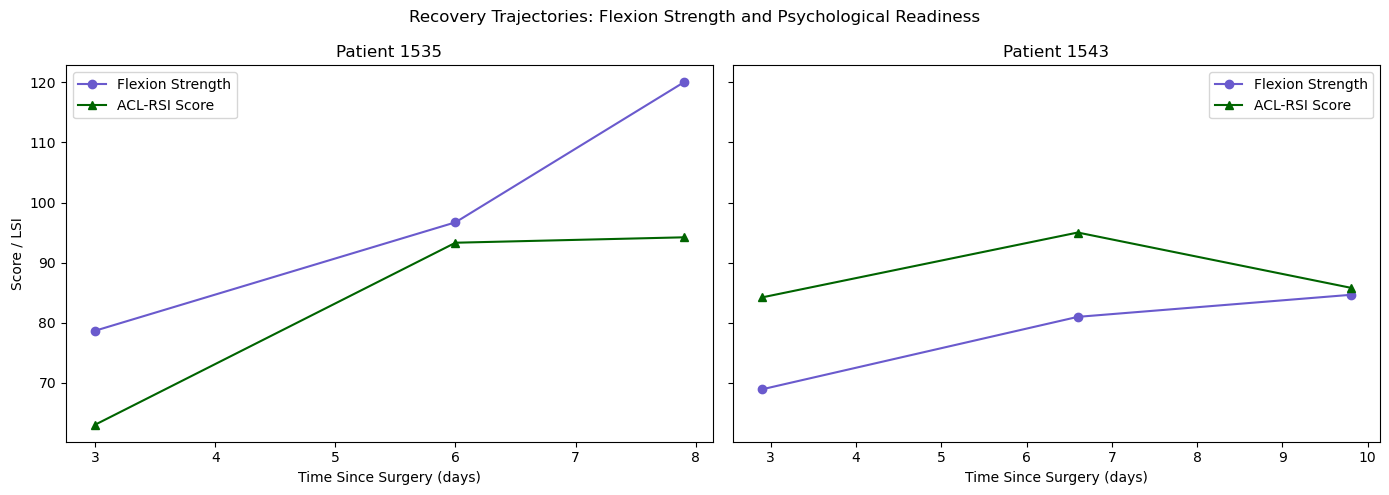

In [16]:
df_flex_rsi = aclr.dropna(subset=['tss', 'lsi_flex_mvic_60', 'acl_rsi'])

# Find patients with at least 3 valid visits for those variables
valid_counts_flex = df_flex_rsi['record_id'].value_counts()
valid_ids_flex = valid_counts_flex[valid_counts_flex >= 3].index[:2]

# Filter for those patients
df_flex_traj = df_flex_rsi[df_flex_rsi['record_id'].isin(valid_ids_flex)]

# Plot: flexion strength and ACL-RSI over time for each patient
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for i, pid in enumerate(valid_ids_flex):
    df_p = df_flex_traj[df_flex_traj['record_id'] == pid]
    ax = axes[i]
    ax.plot(df_p['tss'], df_p['lsi_flex_mvic_60'], label='Flexion Strength', marker='o', color='slateblue')
    ax.plot(df_p['tss'], df_p['acl_rsi'], label='ACL-RSI Score', marker='^', color='darkgreen')
    ax.set_title(f"Patient {pid}")
    ax.set_xlabel("Time Since Surgery (days)")
    if i == 0:
        ax.set_ylabel("Score / LSI")
    ax.legend()

fig.suptitle("Recovery Trajectories: Flexion Strength and Psychological Readiness")
plt.tight_layout()
plt.show()

<Axes: xlabel='tss', ylabel='lsi_flex_mvic_60'>

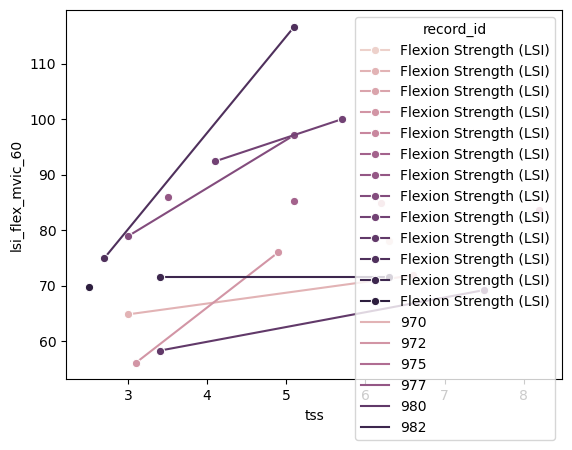

In [ ]:
df_flex_rsi = aclr.dropna(subset=['tss', 'lsi_flex_mvic_60', 'acl_rsi', 'record_id'])

# Find patients with at least 3 valid visits for those variables
valid_counts_flex = df_flex_rsi['record_id'].value_counts()
valid_ids_flex = valid_counts_flex[valid_counts_flex >= 3].index[:2]
df_flex_rsi = df_flex_rsi.head(20)

sns.lineplot(data=df_flex_rsi, x='lsi_flex_mvic_60', y='', label='Flexion Strength (LSI)', marker='o', hue='record_id')
#plt.plot(df_flex_rsi['tss'], df_flex_rsi['acl_rsi'], label='ACL-RSI', marker='o', hue='record_id')

In [27]:
#define the selected patients that filter patinets with 2 or more visits and picked the top 5
df_required_2 = aclr.dropna(subset=['lsi_flex_mvic_60', 'acl_rsi', 'tss'])
patient_counts_2 = df_required_2['record_id'].value_counts()
selected_patients_2 = patient_counts_2[patient_counts_2 >= 2].index[:5]
df_selected_2 = df_required_2[df_required_2['record_id'].isin(selected_patients_2)]


#same with iso
df_iso_required = aclr.dropna(subset=['lsi_ext_isok_60', 'acl_rsi', 'tss'])
patient_counts_iso = df_iso_required['record_id'].value_counts()
selected_iso_patients = patient_counts_iso[patient_counts_iso >= 2].index[:5]
df_iso_selected = df_iso_required[df_iso_required['record_id'].isin(selected_iso_patients)]


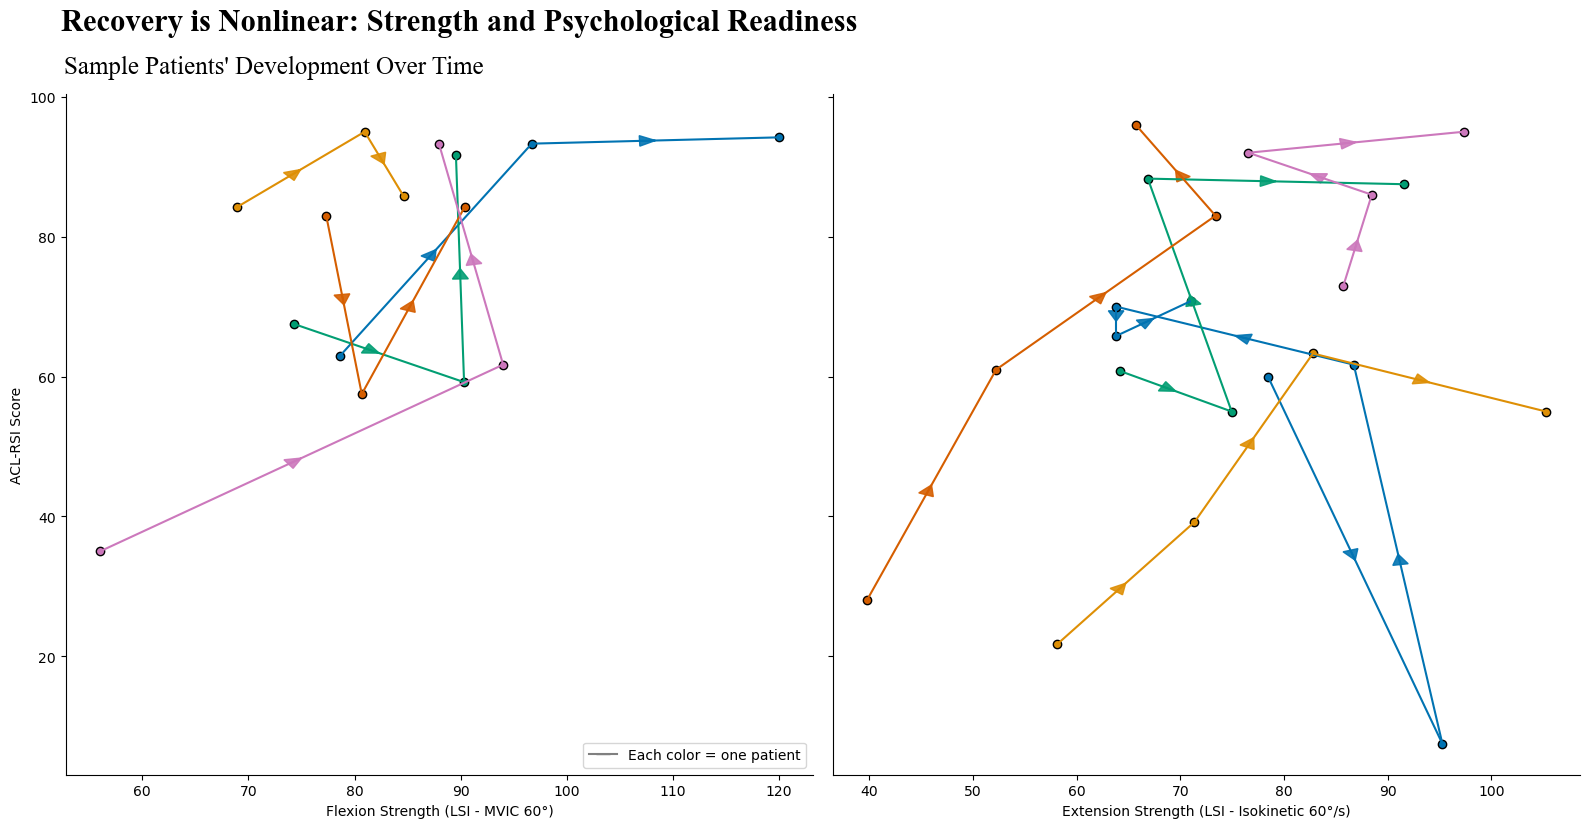

In [61]:
#make the legend sit inside the plot 
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)


#first plot the flexion strength vs rsi
palette = sns.color_palette("colorblind", len(selected_patients_2))
for i, pid in enumerate(selected_patients_2):
   patient_df = df_selected_2[df_selected_2['record_id'] == pid]
   x_vals = patient_df['lsi_flex_mvic_60'].values
   y_vals = patient_df['acl_rsi'].values
   for j in range(len(x_vals) - 1):
       dx = x_vals[j+1] - x_vals[j]
       dy = y_vals[j+1] - y_vals[j]
       x_mid = (x_vals[j] + x_vals[j+1]) / 2
       y_mid = (y_vals[j] + y_vals[j+1]) / 2
       axes[0].arrow(x_mid, y_mid,dx * 0.0001, dy * 0.0001,color=palette[i],alpha=0.9,head_width=1.5,head_length=1.5,length_includes_head=True)
       axes[0].plot([x_vals[j], x_vals[j+1]], [y_vals[j], y_vals[j+1]], color=palette[i], linewidth=1.5)
   axes[0].scatter(x_vals, y_vals, color=palette[i], edgecolor='k')
axes[0].set_xlabel("Flexion Strength (LSI - MVIC 60°)")
axes[0].set_ylabel("ACL-RSI Score")


#make the legend
legend_patch = plt.Line2D([0], [0], marker='_', color='grey', label='Each color = one patient',markerfacecolor='gray', markersize=10)
axes[0].legend(handles=[legend_patch], loc='lower right')


#make the second plot for extension strength vs rsi
palette_ext = sns.color_palette("colorblind", len(selected_iso_patients))
for i, pid in enumerate(selected_iso_patients):
   patient_df = df_iso_selected[df_iso_selected['record_id'] == pid]
   x_vals = patient_df['lsi_ext_isok_60'].values
   y_vals = patient_df['acl_rsi'].values
   for j in range(len(x_vals) - 1):
       dx = x_vals[j+1] - x_vals[j]
       dy = y_vals[j+1] - y_vals[j]
       x_mid = (x_vals[j] + x_vals[j+1]) / 2
       y_mid = (y_vals[j] + y_vals[j+1]) / 2
       axes[1].arrow(x_mid, y_mid,dx * 0.0001, dy * 0.0001,color=palette_ext[i],alpha=0.9,head_width=1.5,head_length=1.5,length_includes_head=True)
       axes[1].plot([x_vals[j], x_vals[j+1]], [y_vals[j], y_vals[j+1]], color=palette_ext[i], linewidth=1.5)
   axes[1].scatter(x_vals, y_vals, color=palette_ext[i], edgecolor='k')
axes[1].set_xlabel("Extension Strength (LSI - Isokinetic 60°/s)")


#plot final plots
plt.suptitle("Recovery is Nonlinear: Strength and Psychological Readiness", fontsize=22, font = 'Times New Roman', fontweight = 'bold', y=1.03, x =0.29)
fig.text(0.174, 0.972, "Sample Patients' Development Over Time", ha='center', va='top', fontsize=18, font='Times New Roman')
sns.despine(ax=axes[0], top=True, right=True) #take off the top and right spines
sns.despine(ax=axes[1], top=True, right=True)
plt.tight_layout()
plt.show()
